In [68]:
import matplotlib.pyplot as plt
import os, pickle

In [93]:
%run plottingextravaganza.py

In [72]:
resultdir = os.path.normpath(os.getcwd() + "\\plot_dev")
resultfiles = os.listdir(resultdir)

theeverything = []

for file in resultfiles:
    if file.endswith(".p"):
        theeverything.append( pickle.load(open(resultdir+"\\"+file, 'rb')) )

In [105]:
for name in theeverything[1].values():
    print(latex_processing (ising_name_processing (name) ))

$R_{x}$
$R_{y}$
$R_{z}$
$R_{xy}$
$R_{xz}$
$R_{xyz}$
$R_{xyz}HF_{x}$
$R_{xyz}HF_{y}$
$R_{xyz}HF_{z}$
$R_{xyz}HF_{xy}$
$R_{xyz}HF_{xz}$
$R_{xyz}HF_{xyz}$
Term zTx doesn't belong to rotations, Hartree-Fock or transverse.
$R_{xyz}HF_{xyz}$
$R_{xyz}HF_{xyz}T_{xy}$
$R_{xyz}HF_{xyz}T_{xz}$
$R_{xyz}HF_{xyz}T_{xy,xz}$
Term yTx doesn't belong to rotations, Hartree-Fock or transverse.
$R_{xyz}HF_{xyz}T_{xz}$
$R_{xyz}HF_{xyz}T_{xz,yz}$
Term yTx doesn't belong to rotations, Hartree-Fock or transverse.
$R_{xyz}HF_{xyz}T_{xy,xz}$
$R_{xyz}HF_{xyz}T_{xy,xz,yz}$
Term zTx doesn't belong to rotations, Hartree-Fock or transverse.
$R_{xyz}HF_{xyz}T_{xy,xz}$


In [107]:
final = latex_processing (ising_name_processing (name) )

Term zTx doesn't belong to rotations, Hartree-Fock or transverse.


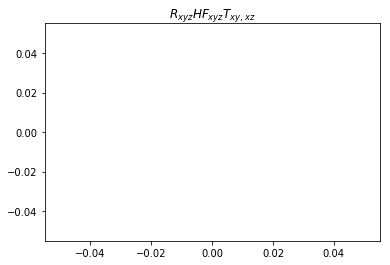

In [108]:
plt.plot()
plt.title(final)

plt.show()

In [120]:
%run plottingextravaganza.py

In [121]:
theeverything[0]

{0: {1.0: [3.527246461067839],
  2.0: [3.0263210486715355],
  4.0: [0.6777750571934382, 0.38582627861212515],
  5.0: [2.4906833222865274],
  6.0: [0.990409746858398],
  9.0: [1.8233750167696199],
  11.0: [0.48703649472292954],
  14.0: [6.537770396961559],
  15.0: [8.412266174972729],
  19.0: [0.3714512238095762]},
 1: {0.0: [0.28350726580565055], 2.0: [0.051793404764221444]},
 2: {0.0: [0.3304342083728923], 1.0: [19.307477555342984]},
 3: {4.0: [0.12760796887271877]},
 4: {0.0: [1.4754157583503376, 2.591840046761847],
  3.0: [7.836501190591314],
  5.0: [1.1350051438754571, 2.3776702229490936],
  6.0: [0.5671741659825383],
  9.0: [0.15976808424339375],
  11.0: [0.33697797496483006],
  14.0: [0.2025097840734212],
  15.0: [16.062164166712645],
  19.0: [0.3538868792562836]},
 5: {0.0: [0.4014962444450657],
  4.0: [0.8810532757459723, 0.4205797718910198],
  6.0: [0.09522312129397376, 1.4521809879431342],
  9.0: [0.48483356911220854],
  11.0: [0.07000645735649817],
  14.0: [0.601383055006257

In [122]:
theeverything[0][1]

{0.0: [0.28350726580565055], 2.0: [0.051793404764221444]}

In [128]:
theeverything[0][0][4]

[0.6777750571934382, 0.38582627861212515]

In [123]:
BayF_IndexDictToMatrix(theeverything[1], theeverything[0])

array([[ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  